In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

import warnings
warnings.filterwarnings('ignore') # Suppress skl k-NN param warnings 

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

In [2]:
np.random.seed(2)

# Read the data
train = pd.read_csv('train.csv')

# No hold out data
#X = train.drop(columns=['Lead'])
#y = train['Lead']

# Setting aside hold out data
df, E_holdout = skl_ms.train_test_split(train, test_size=0.3) # Create hold-out dataset for estimating E_new
X = df.drop(columns=['Lead'])
y = df['Lead']

scaler = skl_pre.StandardScaler().fit(X)

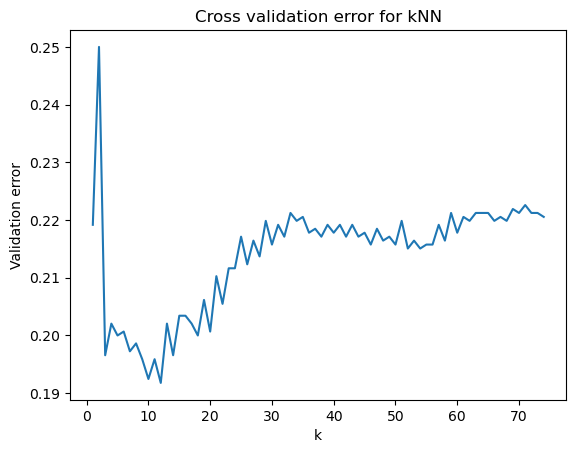

In [3]:
# Manual kFold
n_runs = 10
K = np.arange(1,75)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size=0.2)
    
    X_train_norm = scaler.transform(X_train)
    X_val_norm = scaler.transform(X_val)
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_norm, y_train)
        prediction = model.predict(X_val_norm)
        misclassification[i, j] = np.mean(prediction != y_val)

average_mis = np.mean(misclassification, axis=0)

plt.plot(K, average_mis)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

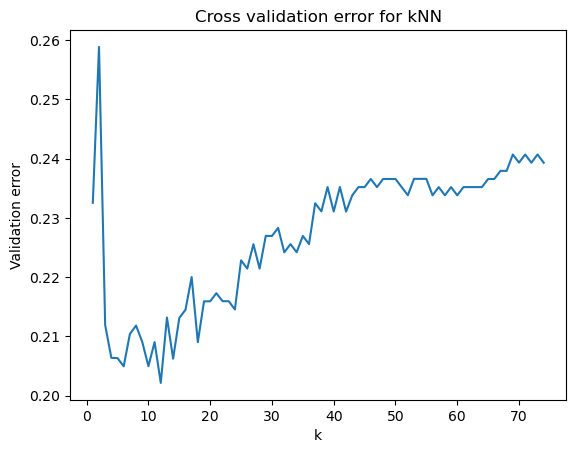

In [4]:
# Using Scikit learn kFold
n_fold = 10

cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(1,75)
misclassification = np.zeros(len(K))

for train_index, val_index in cv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Normalise
    X_train_norm = scaler.transform(X_train)
    X_val_norm = scaler.transform(X_val)
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_norm, y_train)
        prediction = model.predict(X_val_norm)
        misclassification[j] += np.mean(prediction != y_val)

misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

In [5]:
# Analyze model on test data
X_test = E_holdout.drop(columns=['Lead'])
y_test = E_holdout['Lead']

X_norm = scaler.transform(X)
X_test_norm = scaler.transform(X_test)

for k in range(1,50):
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_norm, y)
    prediction = model.predict(X_test_norm)
    print("--------------------")
    print("kNN with k =", k)
    print(pd.crosstab(prediction, y_test))
    print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

--------------------
kNN with k = 1
Lead    Female  Male
row_0               
Female      22    24
Male        56   210
Accuracy: 0.744
--------------------
kNN with k = 2
Lead    Female  Male
row_0               
Female      45    47
Male        33   187
Accuracy: 0.744
--------------------
kNN with k = 3
Lead    Female  Male
row_0               
Female      18    11
Male        60   223
Accuracy: 0.772
--------------------
kNN with k = 4
Lead    Female  Male
row_0               
Female      34    21
Male        44   213
Accuracy: 0.792
--------------------
kNN with k = 5
Lead    Female  Male
row_0               
Female      17     8
Male        61   226
Accuracy: 0.779
--------------------
kNN with k = 6
Lead    Female  Male
row_0               
Female      25     9
Male        53   225
Accuracy: 0.801
--------------------
kNN with k = 7
Lead    Female  Male
row_0               
Female      13     2
Male        65   232
Accuracy: 0.785
--------------------
kNN with k = 8
Lead    Fema

## Trash pile 

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>



n_runs = 10
K = np.arange(1,50)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[i,j] = np.mean(prediction != y_val)

average_mis = np.mean(misclassification, axis=0)

plt.plot(K, average_mis)
plt.show()

# Cheating with grid search hyperparameter tuning
knn = skl_nb.KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,50)}

knn_gscv = skl_ms.GridSearchCV(knn, param_grid, cv=10)

knn_gscv.fit(scaler.transform(X), y)

print(knn_gscv.best_params_)

print(knn_gscv.best_score_)

### {'n_neighbors': 14}
### 0.7998319641523526